In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import sys, os
import glob
import warnings
sys.path.append('../')

import numpy as np

from rankutils.utilities import merge_kfolds_rounds, gen_mod
from rankutils.rIO import read_rank
from rankutils.cfgloader import cfgloader
from rankutils.aggregation import *
from rankutils.evaluation import multi_norm_acc, multi_mcc
from rankutils.drawing import colors_from_cmap

import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

np.set_printoptions(suppress=True, precision=4, linewidth=300)

In [12]:
def plot_hist(hist, edges, ax=None, imgshape=(10, 10), color='blue', label=''):
    
    if not ax:
        fig, ax = plt.subplots()
        fig.set_size_inches(imgshape)
        fig.tight_layout()
    
    bw = edges[1] - edges[0]
    x = edges[0:-1]
    
    ax.bar(x, hist, bw, 0.0, align='edge', color=color, label=label)
    
    return

In [5]:
dset = 'places365_001'
method = '0009.irp.fusion-all.rbfsvm'

pathcfg = cfgloader('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/path_2.cfg')
rktpdir = pathcfg.get(dset, 'rktpdir')

folds = np.load(glob.glob(pathcfg.get(dset, 'rank') + "/*.npy")[0])
predpath = pathcfg.get(dset, 'output') + method + "/"

In [21]:
topk = 10

# Groundtruth
gtlabel = np.load('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-labels/2x5-fold/places365/places365.001.vgg16-L2sq.irp_lbls.npy')
gtlabel = gtlabel[:, 0:topk]

# Predictions
predlabel = np.stack(merge_kfolds_rounds(predpath, folds), axis=-1)

# Modified
modlabel = np.stack([gen_mod(gtlabel, f=0.30) for _ in range(5)], axis=-1)

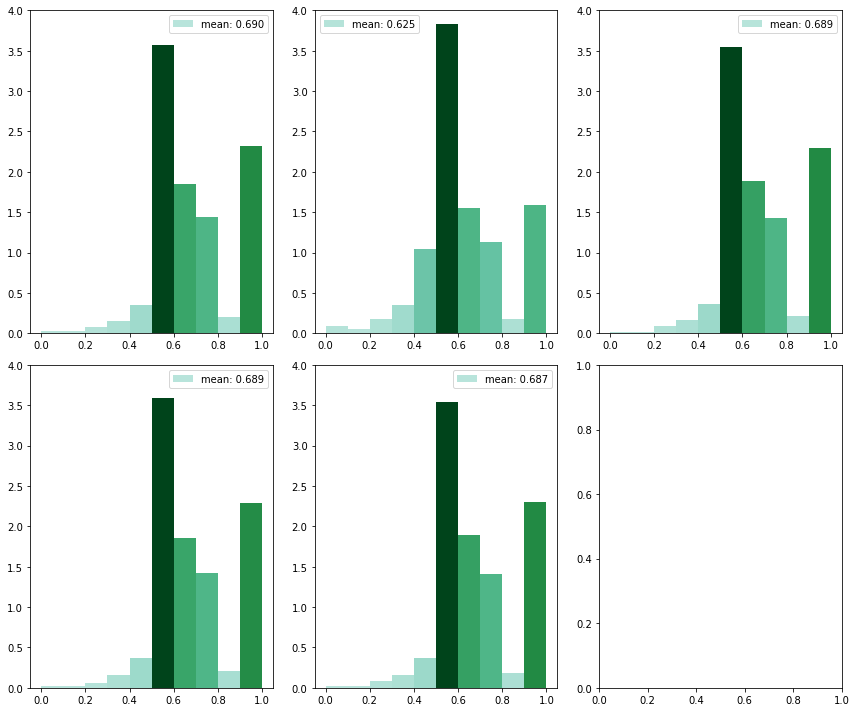

In [16]:
fig, axes = plt.subplots(2, 3)
axes = axes.reshape(-1)
fig.set_size_inches((12, 10))
fig.tight_layout()


for i in range(5):
    ax = axes[i]
    naccs, mean_naccs = multi_norm_acc(gtlabel, predlabel[:,:,i])
    hist, edges = np.histogram(naccs, bins=np.arange(0.0, 1.1, 0.1, dtype=np.float64), range=(0.0, 1.0), density=True)
    plot_hist(hist, edges, ax=ax, 
              color=colors_from_cmap('BuGn', hist, (0.3, 1.0)), label='mean: {0:0.3f}'.format(mean_naccs))
    
    ax.set_ylim(0.0, 4.0)
    ax.legend()
    mpld3.disable_notebook()

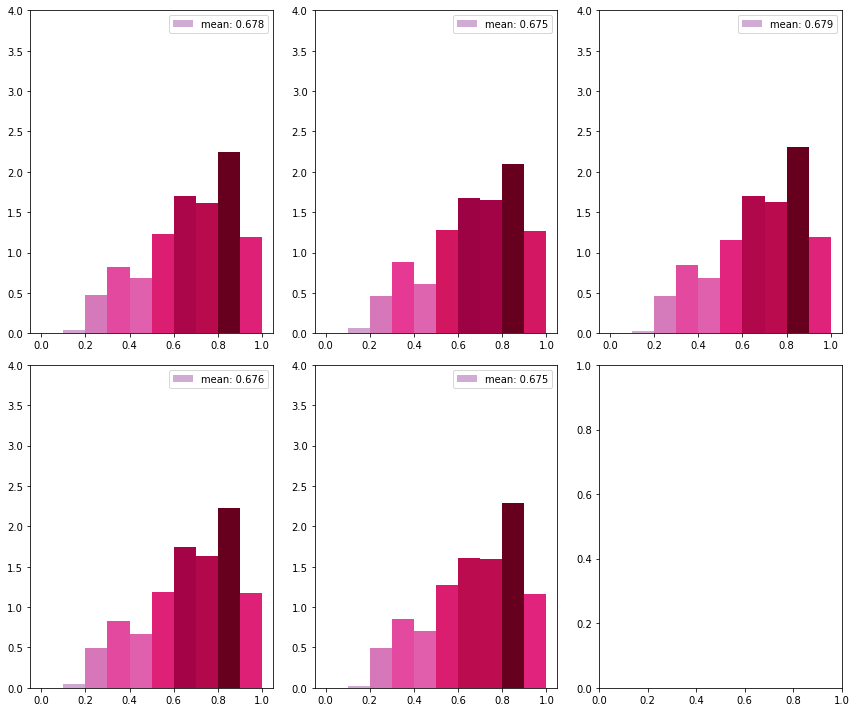

In [22]:
fig, axes = plt.subplots(2, 3)
axes = axes.reshape(-1)
fig.set_size_inches((12, 10))
fig.tight_layout()


for i in range(5):
    ax = axes[i]
    naccs, mean_naccs = multi_norm_acc(gtlabel, modlabel[:,:,i])
    hist, edges = np.histogram(naccs, bins=np.arange(0.0, 1.1, 0.1, dtype=np.float64), range=(0.0, 1.0), density=True)
    plot_hist(hist, edges, ax=ax, 
              color=colors_from_cmap('PuRd', hist, (0.3, 1.0)), label='mean: {0:0.3f}'.format(mean_naccs))
    
    ax.set_ylim(0.0, 4.0)
    ax.legend()
    mpld3.disable_notebook()